In [1]:
# unzip the data
!unzip train.zip

Archive:  train.zip
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Happy/i

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model # Functional API
from keras.layers import Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [3]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf_no_top.h5: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [5]:
model.compile(optimizer='adam', loss= "categorical_crossentropy" , metrics=['accuracy']  )

In [6]:

train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


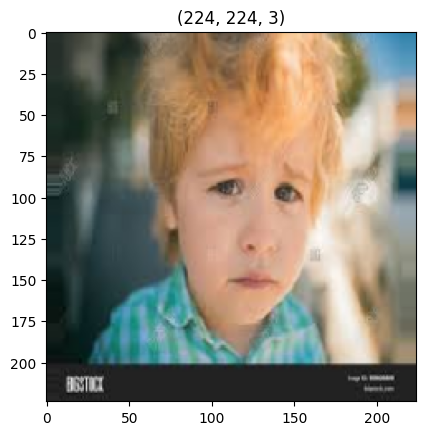

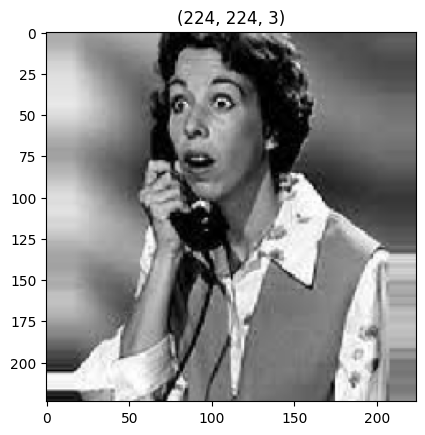

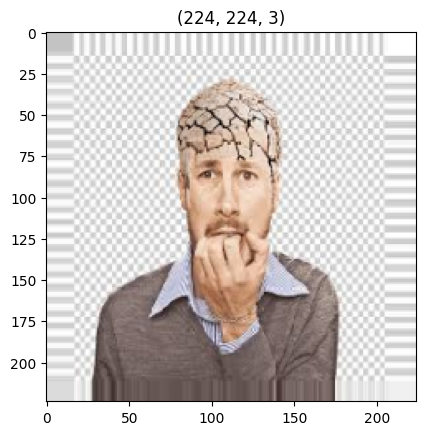

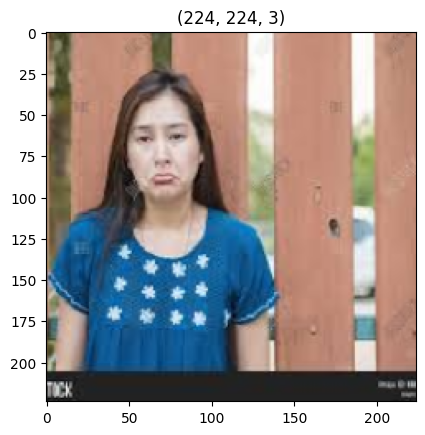

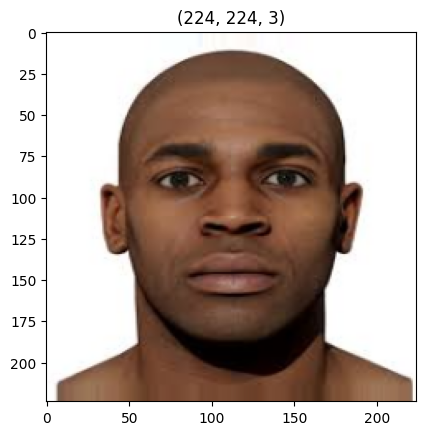

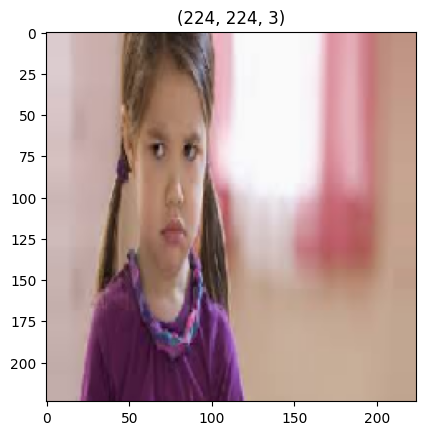

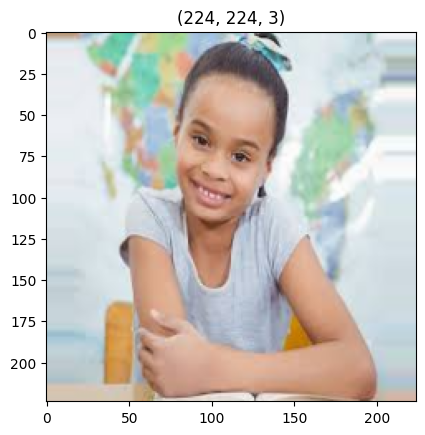

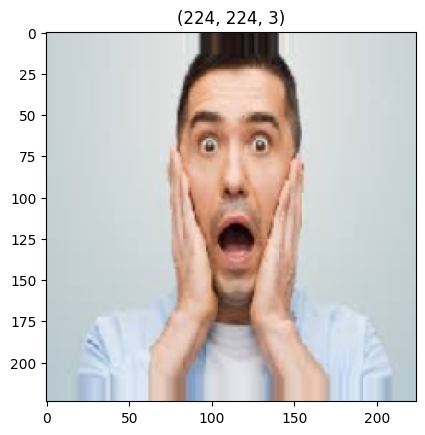

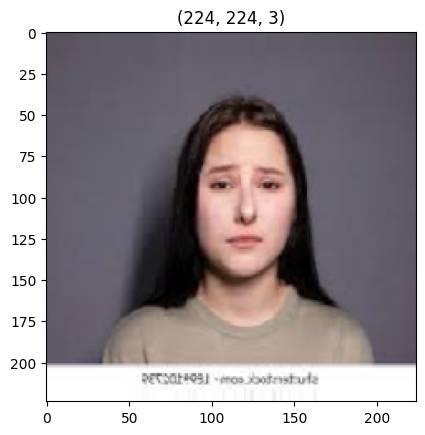

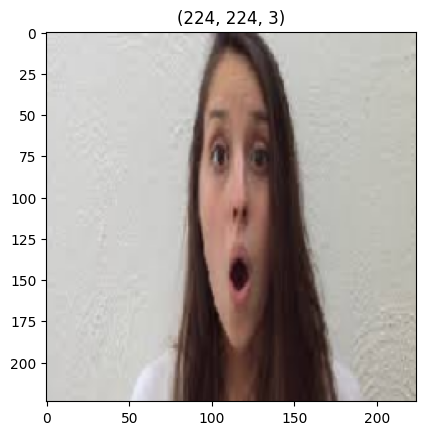

In [8]:

# to visualize the images in the traing data denerator

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [9]:

## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [11]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

<ipython-input-11-f681b3c69731>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.2787 - accuracy: 0.6447
Epoch 1: val_accuracy improved from 0.50391 to 0.77734, saving model to best_model.h5
10/10 [==============================] - 38s 4s/step - loss: 2.2787 - accuracy: 0.6447 - val_loss: 1.3928 - val_accuracy: 0.7773
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.2700 - accuracy: 0.7925
Epoch 2: val_accuracy improved from 0.77734 to 0.87891, saving model to best_model.h5
10/10 [==============================] - 38s 4s/step - loss: 1.2700 - accuracy: 0.7925 - val_loss: 0.6461 - val_accuracy: 0.8789
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.5021 - accuracy: 0.8899
Epoch 3: val_accuracy improved from 0.87891 to 0.96484, saving model to best_model.h5
10/10 [==============================] - 44s 5s/step - loss: 0.5021 - accuracy: 0.8899 - val_loss: 0.1628 - val_accuracy: 0.9648
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.252

In [12]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [13]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

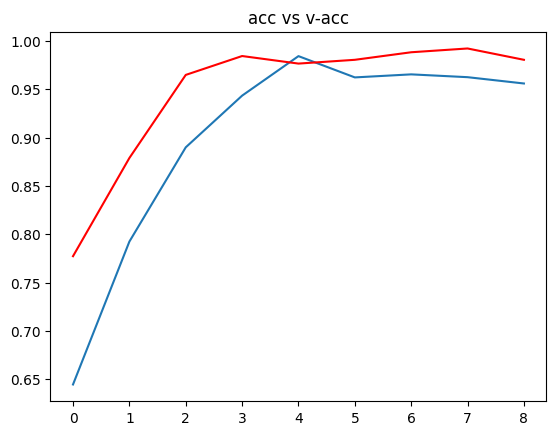

In [14]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

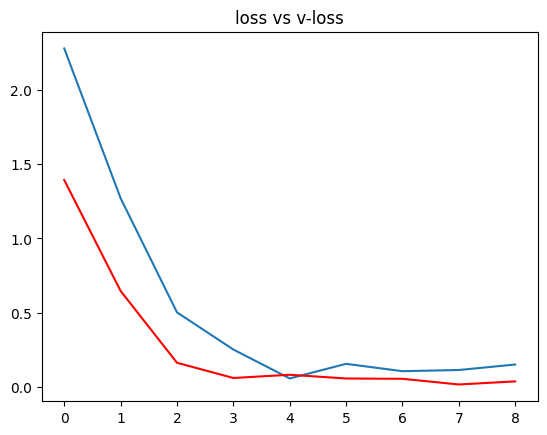

In [15]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [16]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
# path for the image to see if it predics correct class

path = "/content/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()